# Analyzing UK Train Rides with Python
***

1. Setting Up the Environment
   * Install and import necessary libraries.

In [1]:
# Install necessary libraries (if not already installed)
# !pip install pandas numpy matplotlib seaborn

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

***
2. Data Collection
   * Load the dataset.
   * Check the first few rows.
   * Check the dataset size.
   * Inspect column names and data types.

In [3]:
# Load the dataset
df = pd.read_csv("railway.csv")

# Display the first few rows
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [4]:
# Check the dataset size
df.shape

(31653, 18)

In [5]:
# Inspect column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

***
3. Data Cleaning
   * Handle missing values.
   * Remove duplicates.
   * Handle Inconsistent Data.
   * Correct Data Types
   * Handle outliers in numerical columns.
   * Perform feature engineering.
   * Validate the Cleaned Data.

In [6]:
# Check for missing values
df.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

In [7]:
# Handle missing values in Railcard column
df['Railcard'] = df['Railcard'].fillna('No Railcard')

In [8]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

0


In [9]:
# Handle Inconsistent Data: Standardize data formats and resolve inconsistencies.

# Check for inconsistent values in categorical columns
cat_columns = ['Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class', 'Ticket Type', 'Departure Station', 'Arrival Destination', 'Journey Status', 'Reason for Delay', 'Refund Request']
for col in cat_columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values: {unique_values}")
    print(f"Number of unique values: {len(unique_values)}")
    print("-" * 60)

Column: Purchase Type
Unique values: ['Online' 'Station']
Number of unique values: 2
------------------------------------------------------------
Column: Payment Method
Unique values: ['Contactless' 'Credit Card' 'Debit Card']
Number of unique values: 3
------------------------------------------------------------
Column: Railcard
Unique values: ['Adult' 'No Railcard' 'Disabled' 'Senior']
Number of unique values: 4
------------------------------------------------------------
Column: Ticket Class
Unique values: ['Standard' 'First Class']
Number of unique values: 2
------------------------------------------------------------
Column: Ticket Type
Unique values: ['Advance' 'Off-Peak' 'Anytime']
Number of unique values: 3
------------------------------------------------------------
Column: Departure Station
Unique values: ['London Paddington' 'London Kings Cross' 'Liverpool Lime Street'
 'London Euston' 'York' 'Manchester Piccadilly' 'Birmingham New Street'
 'London St Pancras' 'Oxford' 'Read

In [10]:
# Standardize text in "Reason for Delay" column: Capitalize each word
df['Reason for Delay'] = df['Reason for Delay'].str.title()

In [11]:
# Replace inconsistent values:
# 1. Arrival Destination column: 'Edinburgh' >> 'Edinburgh Waverley'
df['Arrival Destination'] = df['Arrival Destination'].replace({'Edinburgh': 'Edinburgh Waverley'})

# 2. Reason for Delay column: 'Staffing' >> 'Staff Shortage', 'Weather' >> 'Weather Conditions'
df['Reason for Delay'] = df['Reason for Delay'].replace({'Staffing': 'Staff Shortage', 'Weather': 'Weather Conditions'})

In [12]:
# Convert date/time columns to datetime format
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['Time of Purchase'] = pd.to_datetime(df['Date of Purchase']) + pd.to_timedelta(df['Time of Purchase'])
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'])
df['Departure Time'] = pd.to_datetime(df['Date of Journey']) + pd.to_timedelta(df['Departure Time'])
df['Arrival Time'] = pd.to_datetime(df['Date of Journey']) + pd.to_timedelta(df['Arrival Time'])
df['Actual Arrival Time'] = df.apply(
    lambda row: pd.to_datetime(row['Date of Journey']) + pd.to_timedelta(row['Actual Arrival Time'])
    if pd.notna(row['Actual Arrival Time']) else pd.NaT, axis=1
    )

In [13]:
# Handle outliers in numerical columns: Identify and address outliers that may skew analysis.

# 1. Detecting outliers using IQR (Interquartile Range)

# Calculate the 1st quartile (Q1), 3rd quartile (Q3), and IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
#outliers

# 2. Capping the outliers at the 5th and 95th percentiles
# df['Price_capped'] = np.where(df['Price'] > upper_bound, upper_bound, 
#                               np.where(df['Price'] < lower_bound, lower_bound, df['Price']))

In [14]:
# Perform Feature Engineering:
    # Create new columns or transform existing ones to enhance analysis.

# Adding 'Delay Duration' column: Create derived metrics
df['Delay Duration'] = pd.to_timedelta(df['Actual Arrival Time'] - df['Arrival Time'], unit='m')

In [15]:
# Summary statistics
df.describe()

,Date of Purchase,Time of Purchase,Price,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Delay Duration
count,31653,31653,31653.000000,31653,31653,31653,29773,29773
mean,2024-02-28 16:16:36.303667968,2024-02-29 04:13:24.259059200,23.439200,2024-03-01 08:01:10.969576192,2024-03-01 20:03:02.826272256,2024-03-01 20:30:28.935645696,2024-03-01 19:19:38.452961024,0 days 00:03:14.981358949
min,2023-12-08 00:00:00,2023-12-08 12:41:11,1.000000,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-01 00:30:00,2024-01-01 00:30:00,0 days 00:00:00
25%,2024-01-30 00:00:00,2024-01-30 02:59:54,5.000000,2024-01-31 00:00:00,2024-01-31 08:00:00,2024-01-31 09:15:00,2024-01-31 09:00:00,0 days 00:00:00
50%,2024-03-01 00:00:00,2024-03-01 12:44:00,11.000000,2024-03-01 00:00:00,2024-03-01 22:15:00,2024-03-01 22:20:00,2024-03-01 13:20:00,0 days 00:00:00
75%,2024-03-31 00:00:00,2024-03-31 09:20:34,35.000000,2024-03-31 00:00:00,2024-03-31 13:15:00,2024-03-31 13:20:00,2024-03-31 10:21:00,0 days 00:00:00
max,2024-04-30 00:00:00,2024-04-30 20:05:39,267.000000,2024-04-30 00:00:00,2024-04-30 23:45:00,2024-04-30 23:50:00,2024-04-30 23:50:00,0 days 03:00:00
std,NaN,NaN,29.997628,NaN,NaN,NaN,NaN,0 days 00:14:46.232314799


In [16]:
# Final checks: Validating the data.
print(df.isnull().sum())        # Recheck for missing values
print(df.duplicated().sum())    # Recheck for duplicates
print(df.info())                # Verify data types and column formats

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard                   0
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
Delay Duration          1880
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Transaction ID       31653 non-null  object         
 1   Date of Purchase     31653 non-null  datetime64[ns] 
 2   Time of Purchase     31653 non-null  datetime64[ns] 
 3   Purchase Type        31653 non

***


In [17]:
df

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Delay Duration
0,da8a6ba8-b3dc-4677-b176,2023-12-08,2023-12-08 12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,On Time,NaN,No,0 days 00:00:00
1,b0cdd1b0-f214-4197-be53,2023-12-16,2023-12-16 11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,No,0 days 00:05:00
2,f3ba7a96-f713-40d9-9629,2023-12-19,2023-12-19 19:51:27,Online,Credit Card,No Railcard,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,On Time,NaN,No,0 days 00:00:00
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,2023-12-20 23:00:36,Station,Credit Card,No Railcard,Standard,Advance,13,London Paddington,Reading,2024-01-01,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,On Time,NaN,No,0 days 00:00:00
4,2be00b45-0762-485e-a7a3,2023-12-27,2023-12-27 18:22:56,Online,Contactless,No Railcard,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,On Time,NaN,No,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,2024-04-30,2024-04-30 18:42:58,Online,Credit Card,No Railcard,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,2024-04-30 20:00:00,2024-04-30 20:30:00,2024-04-30 20:30:00,On Time,NaN,No,0 days 00:00:00
31649,7da22246-f480-417c-bc2f,2024-04-30,2024-04-30 18:46:10,Online,Contactless,No Railcard,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,2024-04-30 20:15:00,2024-04-30 21:35:00,2024-04-30 21:35:00,On Time,NaN,No,0 days 00:00:00
31650,add9debf-46c1-4c75-b52d,2024-04-30,2024-04-30 18:56:41,Station,Credit Card,No Railcard,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,2024-04-30 20:15:00,2024-04-30 20:45:00,2024-04-30 20:45:00,On Time,NaN,No,0 days 00:00:00
31651,b92b047c-21fd-4859-966a,2024-04-30,2024-04-30 19:51:47,Station,Credit Card,No Railcard,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,2024-04-30 21:15:00,2024-04-30 22:35:00,2024-04-30 22:35:00,On Time,NaN,No,0 days 00:00:00


***
### Normalizing the Dataset
#### Loading The Station table

In [18]:
# Load the Station table
station_df = pd.read_csv('Station.csv')
station_df.head()

,Station Code,Station Name
0,BHM,Birmingham New Street
1,BRI,Bristol Temple Meads
2,CDF,Cardiff Central
3,COV,Coventry
4,CRE,Crewe


***
#### Generating the Routes table

In [19]:
# Create a new table called Routes
routes_df = df[['Departure Station', 'Arrival Destination']]
routes_df = routes_df.drop_duplicates()
routes_df.head()

,Departure Station,Arrival Destination
0,London Paddington,Liverpool Lime Street
1,London Kings Cross,York
2,Liverpool Lime Street,Manchester Piccadilly
3,London Paddington,Reading
4,Liverpool Lime Street,London Euston


In [20]:
# # Using the map() funtion:
# # Create a mapping dictionary
# station_mapping = dict(zip(station_df['Station Name'], station_df['Station Code']))

# # Display the mapping dictionary
# print("Station Mapping:")
# print(station_mapping)

# # Replace Departure Station names with codes
# routes_df['Departure Station'] = routes_df['Departure Station'].map(station_mapping)

# # Replace Arrival Destination names with codes
# routes_df['Arrival Destination'] = routes_df['Arrival Destination'].map(station_mapping)

# # Rename the merged column to Departure Station Code
# routes_df.rename(columns={'Departure Station': 'Departure Station Code', 'Arrival Destination': 'Arrival Destination Code'}, inplace=True)

# # Display the updated Routes table
# print("Updated Routes Table:")
# display(routes_df.head())

In [21]:
# Using the merge() function:

# Merge for Departure Station
routes_df = pd.merge(
    routes_df,
    station_df,
    how='left',
    left_on='Departure Station',
    right_on='Station Name'
)

# Rename the merged column to Departure Station Code
routes_df.rename(columns={'Station Code': 'Departure Station Code'}, inplace=True)

# Drop the original Departure Station column
routes_df.drop(columns=['Departure Station', 'Station Name'], inplace=True)

# Merge for Arrival Destination
routes_df = pd.merge(
    routes_df,
    station_df,
    how='left',
    left_on='Arrival Destination',
    right_on='Station Name'
)

# Rename the merged column to Arrival Destination Code
routes_df.rename(columns={'Station Code': 'Arrival Destination Code'}, inplace=True)

# Drop the original Arrival Destination column
routes_df.drop(columns=['Arrival Destination', 'Station Name'], inplace=True)

In [22]:
# Create a 'Route Code' column:
routes_df['Route Code'] = routes_df['Departure Station Code'] + '-' + routes_df['Arrival Destination Code']

# Move column 'Route Code' to the first position
routes_df.insert(0, 'Route Code', routes_df.pop('Route Code'))

# Display the updated Routes table
print("Updated Routes Table:")
display(routes_df.head())

Updated Routes Table:


,Route Code,Departure Station Code,Arrival Destination Code
0,PAD-LIV,PAD,LIV
1,KGX-YRK,KGX,YRK
2,LIV-MAN,LIV,MAN
3,PAD-RDG,PAD,RDG
4,LIV-EUS,LIV,EUS


In [23]:
# Save the Routes table to CSV file
routes_df.to_csv("Routes.csv", index=False)

***
#### Generating the Journeys table

In [24]:
# Display the original DataFrame columns
print("Original DataFrame Columns:")
display(df.columns)

Original DataFrame Columns:


Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Reason for Delay',
       'Refund Request', 'Delay Duration'],
      dtype='object')

In [25]:
# Create the Journeys table by selecting related columns
journeys_df = df[[
    'Transaction ID',
    'Departure Station', 
    'Arrival Destination',
    'Date of Journey', 
    'Departure Time', 
    'Arrival Time',
    'Actual Arrival Time', 
    'Delay Duration', 
    'Journey Status', 
    'Reason for Delay'
]].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Drop duplicates in the Journeys table
journeys_df = journeys_df.drop_duplicates()

# Display the Journeys table
print("Journeys Table:")
display(journeys_df)

Journeys Table:


,Transaction ID,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Delay Duration,Journey Status,Reason for Delay
0,da8a6ba8-b3dc-4677-b176,London Paddington,Liverpool Lime Street,2024-01-01,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,0 days 00:00:00,On Time,NaN
1,b0cdd1b0-f214-4197-be53,London Kings Cross,York,2024-01-01,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,0 days 00:05:00,Delayed,Signal Failure
2,f3ba7a96-f713-40d9-9629,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,0 days 00:00:00,On Time,NaN
3,b2471f11-4fe7-4c87-8ab4,London Paddington,Reading,2024-01-01,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,0 days 00:00:00,On Time,NaN
4,2be00b45-0762-485e-a7a3,Liverpool Lime Street,London Euston,2024-01-01,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,0 days 00:00:00,On Time,NaN
...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,2024-04-30 20:00:00,2024-04-30 20:30:00,2024-04-30 20:30:00,0 days 00:00:00,On Time,NaN
31649,7da22246-f480-417c-bc2f,London Euston,Birmingham New Street,2024-04-30,2024-04-30 20:15:00,2024-04-30 21:35:00,2024-04-30 21:35:00,0 days 00:00:00,On Time,NaN
31650,add9debf-46c1-4c75-b52d,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,2024-04-30 20:15:00,2024-04-30 20:45:00,2024-04-30 20:45:00,0 days 00:00:00,On Time,NaN
31651,b92b047c-21fd-4859-966a,London Euston,Birmingham New Street,2024-04-30,2024-04-30 21:15:00,2024-04-30 22:35:00,2024-04-30 22:35:00,0 days 00:00:00,On Time,NaN


In [26]:
# Replacing the 'Departure Station' and 'Arrival Destination' columns by "Route Code" column
# Create a mapping dictionary for station names to codes
station_mapping = dict(zip(station_df['Station Name'], station_df['Station Code']))

# Replace Departure Station names with codes
journeys_df['Departure Station Code'] = journeys_df['Departure Station'].map(station_mapping)

# Replace Arrival Destination names with codes
journeys_df['Arrival Destination Code'] = journeys_df['Arrival Destination'].map(station_mapping)

# Drop the original station name columns (optional)
journeys_df.drop(columns=['Departure Station', 'Arrival Destination'], inplace=True)

# Merge Journeys with specific columns from Routes
# Ensure routes_df has the required columns: Route Code, Departure Station Code, Arrival Station Code
journeys_df = pd.merge(
    journeys_df,
    routes_df,
    how='left',
    left_on=['Departure Station Code', 'Arrival Destination Code'],
    right_on=['Departure Station Code',	'Arrival Destination Code']
)

# Drop the redundant columns after merge
journeys_df.drop(columns=['Departure Station Code', 'Arrival Destination Code'], inplace=True)

# Move 'Route Code' to the first position
journeys_df.insert(1, 'Route Code', journeys_df.pop('Route Code'))

# Display the updated Journeys table
print("Updated Journeys Table:")
display(journeys_df.head())

Updated Journeys Table:


,Transaction ID,Route Code,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Delay Duration,Journey Status,Reason for Delay
0,da8a6ba8-b3dc-4677-b176,PAD-LIV,2024-01-01,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,0 days 00:00:00,On Time,NaN
1,b0cdd1b0-f214-4197-be53,KGX-YRK,2024-01-01,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,0 days 00:05:00,Delayed,Signal Failure
2,f3ba7a96-f713-40d9-9629,LIV-MAN,2024-01-02,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,0 days 00:00:00,On Time,NaN
3,b2471f11-4fe7-4c87-8ab4,PAD-RDG,2024-01-01,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,0 days 00:00:00,On Time,NaN
4,2be00b45-0762-485e-a7a3,LIV-EUS,2024-01-01,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,0 days 00:00:00,On Time,NaN


In [27]:
# Genertating the 'Journey ID' column
journey_id = (
    journeys_df['Route Code'] + ':' + 
    journeys_df['Date of Journey'].dt.strftime('%Y%m%d') + ':' +
    journeys_df['Departure Time'].dt.strftime('%H%M')
)

# Insert the 'Journey ID' column at the beginning of the DataFrame
journeys_df.insert(1, 'Journey ID', journey_id )

# Display the updated DataFrame
print("Updated Journeys Table with 'Journey ID':")
display(journeys_df.head())

Updated Journeys Table with 'Journey ID':


,Transaction ID,Journey ID,Route Code,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Delay Duration,Journey Status,Reason for Delay
0,da8a6ba8-b3dc-4677-b176,PAD-LIV:20240101:1100,PAD-LIV,2024-01-01,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,0 days 00:00:00,On Time,NaN
1,b0cdd1b0-f214-4197-be53,KGX-YRK:20240101:0945,KGX-YRK,2024-01-01,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,0 days 00:05:00,Delayed,Signal Failure
2,f3ba7a96-f713-40d9-9629,LIV-MAN:20240102:1815,LIV-MAN,2024-01-02,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,0 days 00:00:00,On Time,NaN
3,b2471f11-4fe7-4c87-8ab4,PAD-RDG:20240101:2130,PAD-RDG,2024-01-01,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,0 days 00:00:00,On Time,NaN
4,2be00b45-0762-485e-a7a3,LIV-EUS:20240101:1645,LIV-EUS,2024-01-01,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,0 days 00:00:00,On Time,NaN


***
### Generating the Transactions table

In [28]:
# Create the Transactions table by selecting specific columns
transactions_df = df[[
    'Transaction ID', 
    'Date of Purchase', 
    'Time of Purchase',
    'Purchase Type', 
    'Payment Method', 
    'Railcard', 
    'Ticket Class',
    'Ticket Type', 
    'Price', 
    'Refund Request'
]].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Join transactions_df with journeys_df to add only the 'Journey ID' column
transactions_df = pd.merge(
    transactions_df,
    journeys_df[['Transaction ID', 'Journey ID']],  # Select only 'Transaction ID' and 'Journey ID'
    how='left',
    on='Transaction ID'
)

# Move the 'Journey ID' column to the second position
transactions_df.insert(1, 'Journey ID', transactions_df.pop('Journey ID'))

# Display the Transactions table
print("Transactions Table:")
display(transactions_df.head())

Transactions Table:


,Transaction ID,Journey ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Refund Request
0,da8a6ba8-b3dc-4677-b176,PAD-LIV:20240101:1100,2023-12-08,2023-12-08 12:41:11,Online,Contactless,Adult,Standard,Advance,43,No
1,b0cdd1b0-f214-4197-be53,KGX-YRK:20240101:0945,2023-12-16,2023-12-16 11:23:01,Station,Credit Card,Adult,Standard,Advance,23,No
2,f3ba7a96-f713-40d9-9629,LIV-MAN:20240102:1815,2023-12-19,2023-12-19 19:51:27,Online,Credit Card,No Railcard,Standard,Advance,3,No
3,b2471f11-4fe7-4c87-8ab4,PAD-RDG:20240101:2130,2023-12-20,2023-12-20 23:00:36,Station,Credit Card,No Railcard,Standard,Advance,13,No
4,2be00b45-0762-485e-a7a3,LIV-EUS:20240101:1645,2023-12-27,2023-12-27 18:22:56,Online,Contactless,No Railcard,Standard,Advance,76,No


In [29]:
# Drop duplicates in the Transactions table
transactions_df = transactions_df.drop_duplicates()

# Verify data types and column formats
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    31653 non-null  object        
 1   Journey ID        31653 non-null  object        
 2   Date of Purchase  31653 non-null  datetime64[ns]
 3   Time of Purchase  31653 non-null  datetime64[ns]
 4   Purchase Type     31653 non-null  object        
 5   Payment Method    31653 non-null  object        
 6   Railcard          31653 non-null  object        
 7   Ticket Class      31653 non-null  object        
 8   Ticket Type       31653 non-null  object        
 9   Price             31653 non-null  int64         
 10  Refund Request    31653 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 2.7+ MB


In [30]:
# Sort the DataFrame by 'Time of Purchase'
transactions_df.sort_values(by=['Time of Purchase'], inplace=True, ignore_index=True)

# Display the sorted DataFrame
print("Sorted Transactions Table:")
display(transactions_df.head())

Sorted Transactions Table:


,Transaction ID,Journey ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Refund Request
0,da8a6ba8-b3dc-4677-b176,PAD-LIV:20240101:1100,2023-12-08,2023-12-08 12:41:11,Online,Contactless,Adult,Standard,Advance,43,No
1,b0cdd1b0-f214-4197-be53,KGX-YRK:20240101:0945,2023-12-16,2023-12-16 11:23:01,Station,Credit Card,Adult,Standard,Advance,23,No
2,f3ba7a96-f713-40d9-9629,LIV-MAN:20240102:1815,2023-12-19,2023-12-19 19:51:27,Online,Credit Card,No Railcard,Standard,Advance,3,No
3,b2471f11-4fe7-4c87-8ab4,PAD-RDG:20240101:2130,2023-12-20,2023-12-20 23:00:36,Station,Credit Card,No Railcard,Standard,Advance,13,No
4,2be00b45-0762-485e-a7a3,LIV-EUS:20240101:1645,2023-12-27,2023-12-27 18:22:56,Online,Contactless,No Railcard,Standard,Advance,76,No


In [31]:
# Save the Transactions table to CSV file
transactions_df.to_csv("Transactions.csv", index=False)

***
#### Finalizng Journeys table and saving it

In [32]:
# Drop the 'Transaction ID' in the Journeys table
journeys_df = journeys_df.drop(columns='Transaction ID')

# Drop duplicates in the Journeys table
journeys_df = journeys_df.drop_duplicates()

In [33]:
# Verify data types and column formats
journeys_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19871 entries, 0 to 31652
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Journey ID           19871 non-null  object         
 1   Route Code           19871 non-null  object         
 2   Date of Journey      19871 non-null  datetime64[ns] 
 3   Departure Time       19871 non-null  datetime64[ns] 
 4   Arrival Time         19871 non-null  datetime64[ns] 
 5   Actual Arrival Time  19081 non-null  datetime64[ns] 
 6   Delay Duration       19081 non-null  timedelta64[ns]
 7   Journey Status       19871 non-null  object         
 8   Reason for Delay     1852 non-null   object         
dtypes: datetime64[ns](4), object(4), timedelta64[ns](1)
memory usage: 1.5+ MB


In [34]:
# Sort the DataFrame by 'Departure Time' and 'Arrival Time'
journeys_df.sort_values(by=['Departure Time', 'Arrival Time'], inplace=True, ignore_index=True)

# Display the sorted DataFrame
print("Sorted Journeys Table:")
display(journeys_df.head())

Sorted Journeys Table:


,Journey ID,Route Code,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Delay Duration,Journey Status,Reason for Delay
0,LIV-MAN:20240101:0000,LIV-MAN,2024-01-01,2024-01-01 00:00:00,2024-01-01 00:30:00,2024-01-01 00:30:00,0 days 00:00:00,On Time,NaN
1,EUS-YRK:20240101:0000,EUS-YRK,2024-01-01,2024-01-01 00:00:00,2024-01-01 01:50:00,2024-01-01 02:07:00,0 days 00:17:00,Delayed,Signal Failure
2,PAD-RDG:20240101:0130,PAD-RDG,2024-01-01,2024-01-01 01:30:00,2024-01-01 02:30:00,2024-01-01 02:30:00,0 days 00:00:00,On Time,NaN
3,YRK-DUR:20240101:0145,YRK-DUR,2024-01-01,2024-01-01 01:45:00,2024-01-01 02:35:00,2024-01-01 02:35:00,0 days 00:00:00,On Time,NaN
4,PAD-RDG:20240101:0215,PAD-RDG,2024-01-01,2024-01-01 02:15:00,2024-01-01 03:15:00,2024-01-01 03:15:00,0 days 00:00:00,On Time,NaN


In [35]:
# Save the Journeys table to CSV file
journeys_df.to_csv("Journeys.csv", index=False)

***
### Load Calendar table

In [36]:
# Load Calendar table
calendar = pd.read_csv('Calendar.csv')

print("Calander Table:")
display(calendar)

Calander Table:


,Date,Year,Quarter,Month,Month Name,Week,Day of Week,Day Type,Holiday Name
0,2023-12-01,2023,4,12,Dec,48,Fri,Workday,NaN
1,2023-12-02,2023,4,12,Dec,48,Sat,Weekend,NaN
2,2023-12-03,2023,4,12,Dec,48,Sun,Weekend,NaN
3,2023-12-04,2023,4,12,Dec,49,Mon,Workday,NaN
4,2023-12-05,2023,4,12,Dec,49,Tue,Workday,NaN
...,...,...,...,...,...,...,...,...,...
178,2024-05-27,2024,2,5,May,22,Mon,Holiday,Spring bank holiday
179,2024-05-28,2024,2,5,May,22,Tue,Workday,NaN
180,2024-05-29,2024,2,5,May,22,Wed,Workday,NaN
181,2024-05-30,2024,2,5,May,22,Thu,Workday,NaN


***
### Analysis Questions
3️⃣. Train Performance & Delays (5 Questions)

11. What percentage of journeys are delayed?
Measures train service reliability and helps in reducing delays.
12. What are the most common reasons for delays?
Identifies key issues causing delays and helps in finding solutions.
13. How does delay frequency vary by time of day?
Shows if delays are more common during peak hours, helping in schedule adjustments.
14. What is the average delay duration?
Provides insight into how long delays typically last and their impact on passengers.
15. What percentage of delayed journeys result in refund requests?
Helps evaluate customer dissatisfaction due to delays and assess refund policies.


***
11. What percentage of journeys are delayed?
Measures train service reliability and helps in reducing delays.

,Counts,% of Total
Journey Status,,
Cancelled,790,3.98
Delayed,1062,5.34
On Time,18019,90.68


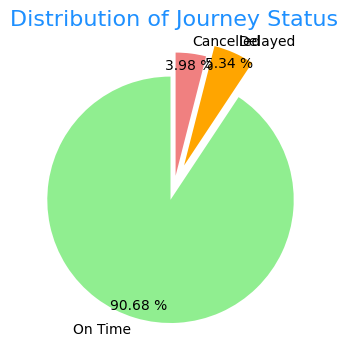

In [37]:
# Group by 'Journey Status' and count 'Journey ID'
journey_status_counts = journeys_df.groupby('Journey Status')['Journey ID'].count().rename('Counts')

# Calculate percentages
total_journeys = journey_status_counts.sum()
journey_status_percentage = round((journey_status_counts / total_journeys) * 100, 2)

# Rename the Series for clarity
journey_status_percentage = journey_status_percentage.rename('Percentage')

# Create a pie chart
plt.figure(figsize=(6, 4))  # Set the figure size
plt.pie(
    journey_status_counts,  # Data for the pie chart
    labels=journey_status_counts.index,  # Labels for each slice
    autopct='%1.2f %%',  # Display percentages on the chart
    pctdistance= 0.9,
    explode= [0.1,0.2,0.1],
    startangle=90,  # Rotate the chart for better readability
    colors=['lightcoral', 'orange','lightgreen'],  # Custom colors
    counterclock=False,
)

# Add a title
plt.title('Distribution of Journey Status', fontsize=16, color='dodgerblue')

# Display Journey Status Counts
display(pd.DataFrame({
    'Counts': journey_status_counts,
    '% of Total': journey_status_percentage
}))

# Display the pie chart
plt.show()

12. What are the most common reasons for delays?
Identifies key issues causing delays and helps in finding solutions.

Reason for Delay Counts:


,Counts
Reason for Delay,
Weather Conditions,280
Technical Issue,268
Staff Shortage,245
Signal Failure,217
Traffic,52


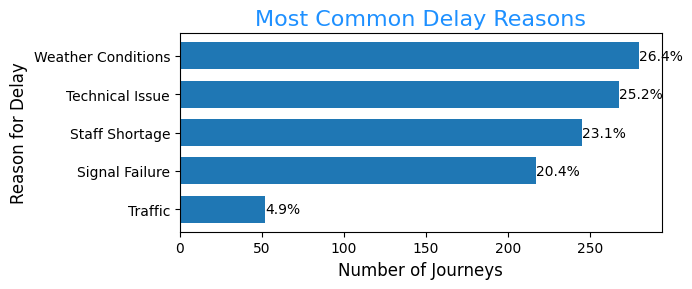

In [38]:
# Leading Causes of Train Services Delay
# Filter the Dataframe by 'Journey Status', group by 'Reason for Delay' and count 'Journey ID'
Reason_for_delay_counts = journeys_df[journeys_df['Journey Status'] == 'Delayed'].groupby('Reason for Delay')['Journey ID'].count().rename('Counts')

# Sort the counts in descending order
Reason_for_delay_counts = Reason_for_delay_counts.sort_values(ascending=True)

# Calculate percentages
total_delayed_journeys = Reason_for_delay_counts.sum()
percentages = (Reason_for_delay_counts / total_delayed_journeys) * 100

# Create a horizontal bar chart
plt.figure(figsize=(7, 3))  # Set the figure size
bars = plt.barh(
    Reason_for_delay_counts.index,  # Y-axis labels (delay reasons)
    Reason_for_delay_counts.values,  # X-axis values (counts)
    height=0.7,
)

# Add percentage labels to each bar
for i, (count, percentage) in enumerate(zip(Reason_for_delay_counts.values, percentages)):
    plt.text(
        count,  # X position (count value)
        i,  # Y position (bar index)
        f'{percentage:.1f}%',  # Percentage label
        va='center',  # Vertical alignment
        ha='left',  # Horizontal alignment
        fontsize=10,
        color='black'
    )

# Add labels and title
plt.xlabel('Number of Journeys', fontsize=12)
plt.ylabel('Reason for Delay', fontsize=12)
plt.title('Most Common Delay Reasons', fontsize=16, color='dodgerblue')

# Display the counts
print("Reason for Delay Counts:")
# Reason_for_delay_counts.rename('Counts')
display(pd.DataFrame(Reason_for_delay_counts.sort_values(ascending=False)))

# Display the bar chart
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Reason for Cancellation Counts:


,Counts
Reason for Delay,
Signal Failure,207
Staff Shortage,192
Weather Conditions,186
Technical Issue,105
Traffic,100


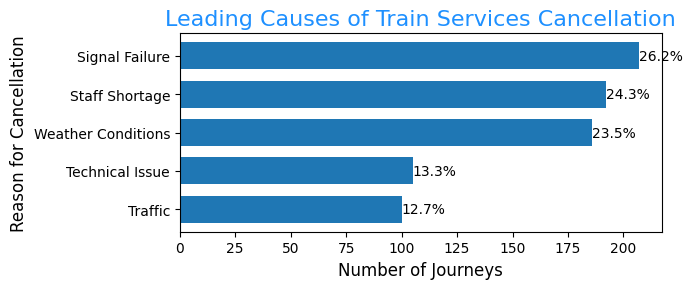

In [39]:
# Leading Causes of Train Services Cancellation
# Filter the Dataframe by 'Journey Status', group by 'Reason for Delay' and count 'Journey ID'
Reason_for_cancellation_counts = journeys_df[journeys_df['Journey Status'] == 'Cancelled'].groupby('Reason for Delay')['Journey ID'].count().rename('Counts')

# Sort the counts in descending order
Reason_for_cancellation_counts = Reason_for_cancellation_counts.sort_values(ascending=True)

# Calculate percentages
total_cancelled_journeys = Reason_for_cancellation_counts.sum()
percentages = (Reason_for_cancellation_counts / total_cancelled_journeys) * 100

# Create a horizontal bar chart
plt.figure(figsize=(7, 3))  # Set the figure size
bars = plt.barh(
    Reason_for_cancellation_counts.index,  # Y-axis labels (cancellation reasons)
    Reason_for_cancellation_counts.values,  # X-axis values (counts)
    height=0.7,
)

# Add percentage labels to each bar
for i, (count, percentage) in enumerate(zip(Reason_for_cancellation_counts.values, percentages)):
    plt.text(
        count,  # X position (count value)
        i,  # Y position (bar index)
        f'{percentage:.1f}%',  # Percentage label
        va='center',  # Vertical alignment
        ha='left',  # Horizontal alignment
        fontsize=10,
        color='black'
    )

# Add labels and title
plt.xlabel('Number of Journeys', fontsize=12)
plt.ylabel('Reason for Cancellation', fontsize=12)
plt.title('Leading Causes of Train Services Cancellation', fontsize=16, color='dodgerblue')

# Display the counts
print("Reason for Cancellation Counts:")
# Reason_for_delay_counts.rename('Counts')
display(pd.DataFrame(Reason_for_cancellation_counts.sort_values(ascending=False)))

# Display the bar chart
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

***

13. How does delay frequency vary by time of day?
Shows if delays are more common during peak hours, helping in schedule adjustments.

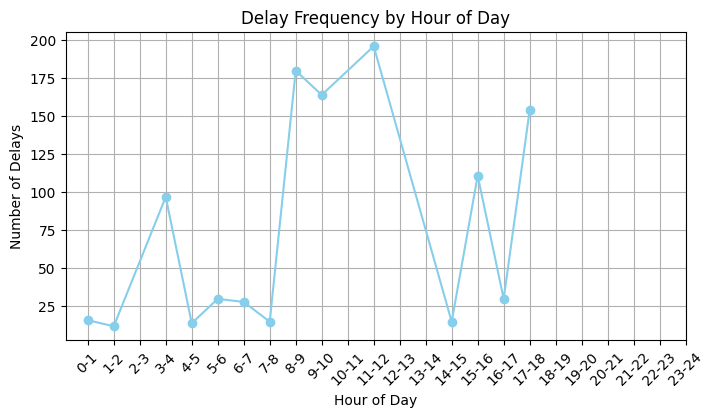

Delay Frequency by Hour of Day:


,count
Departure Time,
11,196
8,180
9,164
17,154
15,111
3,97
5,30
16,30
6,28


In [40]:
# Filter only delayed journeys
delayed_df = journeys_df[journeys_df['Journey Status'] == 'Delayed']

# Count delays per hour
delay_counts_per_hour = delayed_df['Departure Time'].dt.hour.value_counts().sort_index()

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(delay_counts_per_hour.index, delay_counts_per_hour.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Delays")
plt.title("Delay Frequency by Hour of Day")

# Customize x-axis ticks
x_ticks = [f'{i}-{i+1}' for i in range(0, 24)]  # Create labels like '0-1', '1-2', ..., '23-24'
plt.xticks(range(0, 24), x_ticks, rotation=45)  # Show all hours
plt.grid(True)
plt.show()

# Display the counts
print("Delay Frequency by Hour of Day:")
display(pd.DataFrame(delay_counts_per_hour.sort_values(ascending=False)))

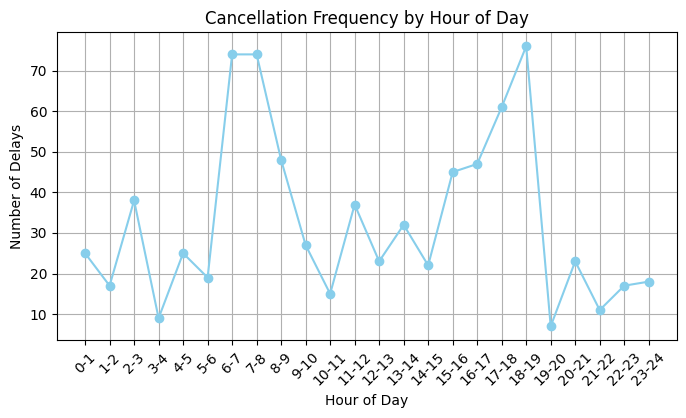

Cancellation Frequency by Hour of Day:


,count
Departure Time,
18,76
6,74
7,74
17,61
8,48
16,47
15,45
2,38
11,37


In [41]:
# Filter only Cancelled journeys
cancelled_df = journeys_df[journeys_df['Journey Status'] == 'Cancelled']

# Count delays per hour
cancelled_counts_per_hour = cancelled_df['Departure Time'].dt.hour.value_counts().sort_index()

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(cancelled_counts_per_hour.index, cancelled_counts_per_hour.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Delays")
plt.title("Cancellation Frequency by Hour of Day")

# Customize x-axis ticks
x_ticks = [f'{i}-{i+1}' for i in range(0, 24)]  # Create labels like '0-1', '1-2', ..., '23-24'
plt.xticks(range(0, 24), x_ticks, rotation=45)  # Show all hours
plt.grid(True)
plt.show()

# Display the counts
print("Cancellation Frequency by Hour of Day:")
display(pd.DataFrame(cancelled_counts_per_hour.sort_values(ascending=False)))

14. What is the average delay duration?
Provides insight into how long delays typically last and their impact on passengers.

In [42]:
# Average Delay Duration
# Filter only delayed journeys
delayed_df = journeys_df[journeys_df['Journey Status'] == 'Delayed']

# Calculate the Average Delay Duration
avg_delay_duration = delayed_df['Delay Duration'].mean()
print(avg_delay_duration.as_unit('s'))

0 days 00:37:43


***